In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting and visualizations
import seaborn as sns  # For statistical data visualization
# Display plots inline in Jupyter notebooks
%matplotlib inline

In [2]:
# Loading the Titanic dataset, which contains demographic and personal information of passengers.
# The goal is to predict the 'Survived' column based on other features.
tit_train = pd.read_csv("train.csv")

In [3]:
# Displaying the first few rows of the dataset to understand its structure, data types, and possible features for analysis.
tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get a summary of the training dataset, including data types and non-null counts
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Generating summary statistics for numeric columns, including mean, min, max, standard deviation, etc.
# This helps identify potential outliers and provides an overview of data distribution for key variables.
tit_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Checking the number of missing values in each column.
# Identifies incomplete data that may need to be handled for model training.
tit_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

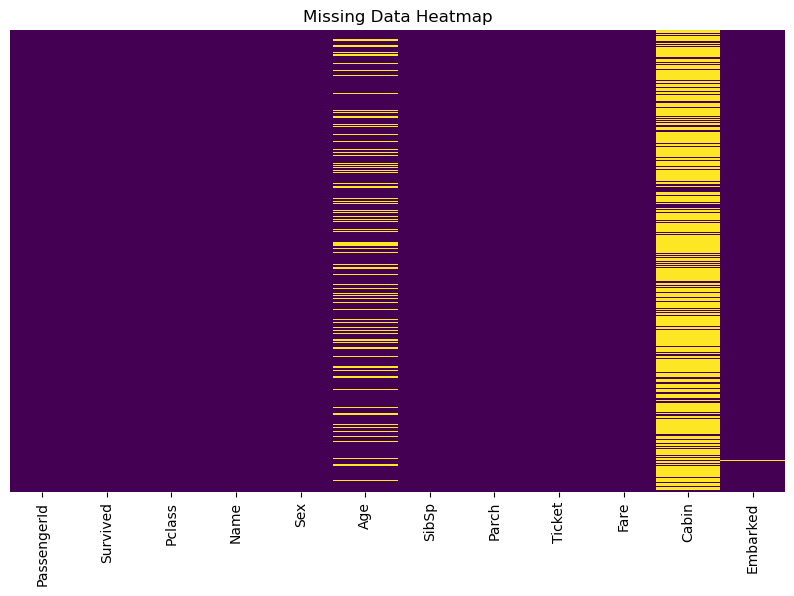

In [7]:
# Heatmap visualization of missing data.
# Shows the distribution and concentration of missing values across features. A high concentration could indicate problematic columns.
plt.figure(figsize=(10, 6))
sns.heatmap(tit_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.savefig('vis_mis_d.png', bbox_inches='tight')
plt.show()

In [8]:
# Separate the dataset into categorical and numeric columns
# This makes it easier to handle different types of data separately
tit_categorical= tit_train[['Survived','Name','Sex','Ticket','Cabin','Embarked',]]
tit_numeric= tit_train[['Age','SibSp','Fare','Parch']]

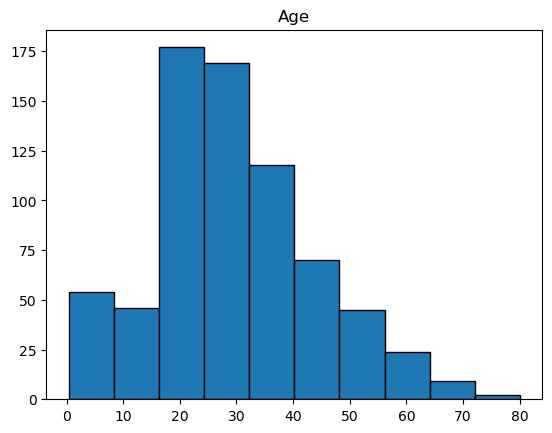

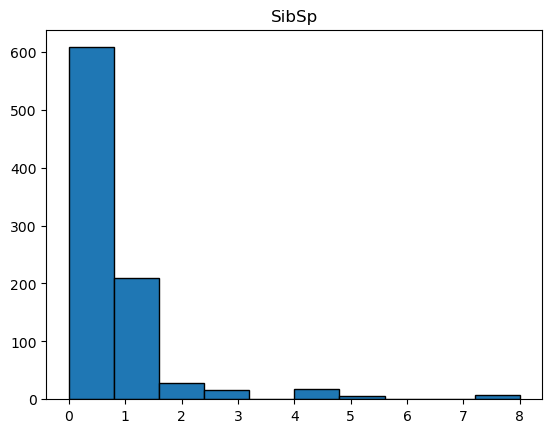

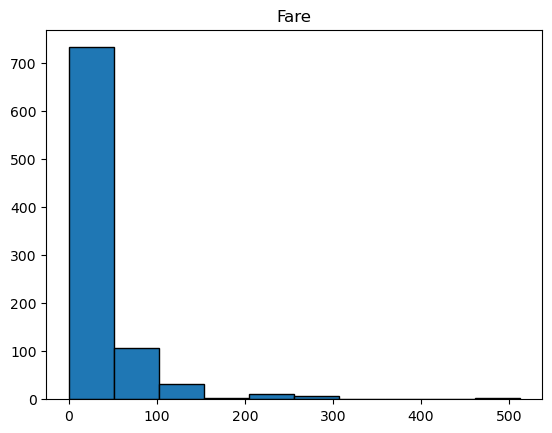

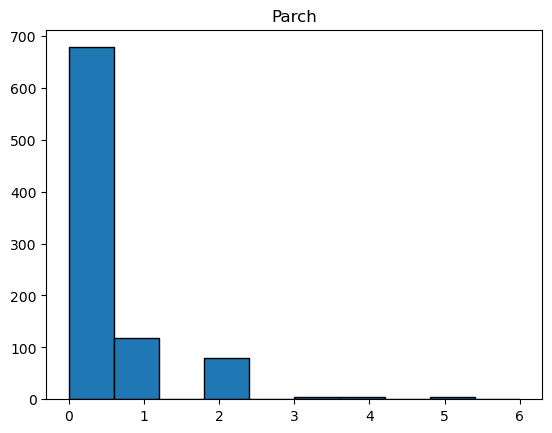

In [9]:
# Plot histograms for each numeric column to understand the data distribution
for i in tit_numeric.columns:
    plt.hist(tit_numeric[i], edgecolor='black')
    plt.title(i)
    plt.show()

<Axes: xlabel='Survived', ylabel='count'>

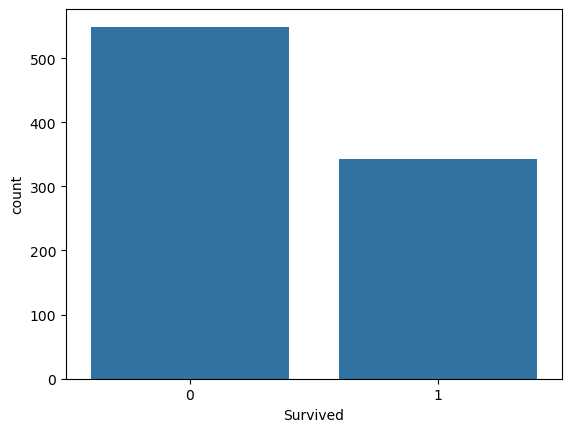

In [10]:
# Visualize the count of survivors in the dataset to understand the balance of the target variable
sns.countplot(x='Survived',data=tit_train,)

In [11]:
# Grouping the data by 'Sex' and 'Survived' to count the occurrences
gender_survival_counts = tit_train.groupby(['Sex', 'Survived']).size().unstack()

# Calculate percentages
gender_survival_percent = gender_survival_counts.div(gender_survival_counts.sum(axis=1), axis=0) * 100

# Rename columns for better understanding
gender_survival_percent.columns = ['Not Survived (%)', 'Survived (%)']

# Display the percentage table
print(gender_survival_percent)

        Not Survived (%)  Survived (%)
Sex                                   
female         25.796178     74.203822
male           81.109185     18.890815


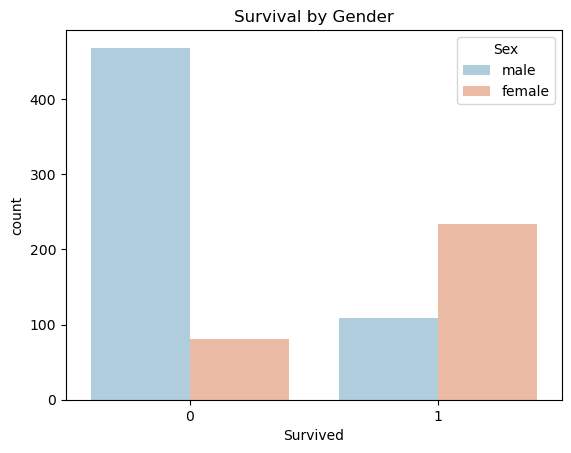

In [12]:
# Visualizing survival rates based on gender.
# The difference in survival between males and females could indicate that gender played a significant role during the rescue.
sns.countplot(x='Survived', hue='Sex', data=tit_train, palette='RdBu_r')
plt.title('Survival by Gender')
plt.savefig('sur_by_gender', bbox_inches='tight')
plt.show()

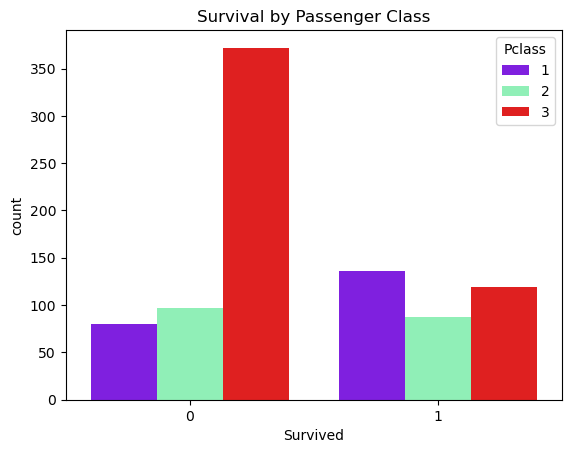

In [13]:
# Analyzing survival rates across passenger classes.
# This relationship can provide insights into whether social status (represented by class) had an impact on survival probability.
sns.countplot(x='Survived', hue='Pclass', data=tit_train, palette='rainbow')
plt.title('Survival by Passenger Class')
plt.savefig('sur_by_pclass', bbox_inches='tight')
plt.show()

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

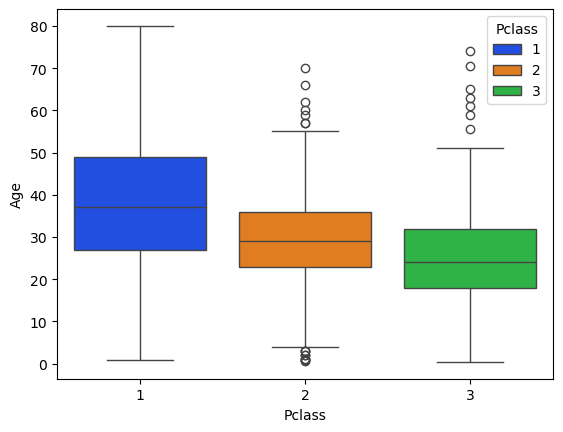

In [14]:
 sns.boxplot(x='Pclass', y='Age', data=tit_train, hue='Pclass', palette='bright')

In [15]:
# Handle missing values in 'Age' by filling them with the median value based on 'Pclass'
# This function checks for missing ages and imputes based on passenger class
def mean_age_train(column):
    Age = column.iloc[0] 
    Pclass = column.iloc[1]
    
    if pd.isnull(Age): # If 'Age' is missing, fill based on 'Pclass'

        if Pclass == 1: # Median age for first class
            return 37

        elif Pclass == 2: # Median age for second class
            return 29

        else:
            return 24 # Median age for third class

    else:
        return Age # If not missing, return the age as is

In [16]:
# Apply the imputation function to the 'Age' column
tit_train['Age'] = tit_train[['Age','Pclass']].apply(mean_age_train,axis=1)

In [17]:
# Drop the 'Cabin' column due to a large number of missing values
# Cabin information is mostly missing and not very helpful for this model
tit_train.drop('Cabin',axis=1,inplace=True)
# And don't forget about the 2 missing values in the embargo column, the best option is to simply delete the rows with the missing values
tit_train = tit_train.dropna(subset=['Embarked'])

<Axes: >

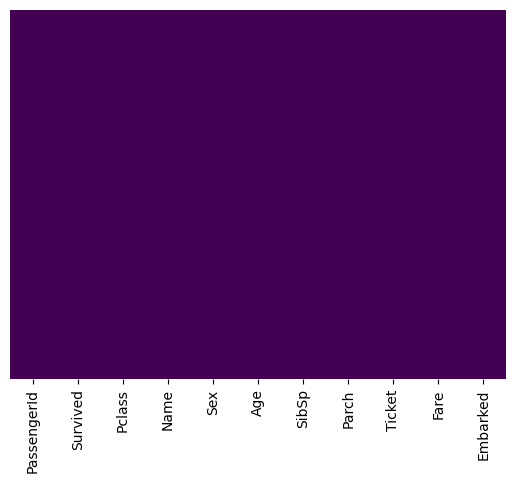

In [18]:
# We check our dataset once again after the cleaning
sns.heatmap(tit_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [19]:
# Once again, I remind myself of the data types 
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
# Convert categorical variables ('Sex' and 'Embarked') into dummy/indicator variables
# This is necessary for the model to handle non-numeric data
sex = pd.get_dummies(tit_train["Sex"], drop_first = True, dtype=float)
embarked = pd.get_dummies(tit_train["Embarked"], drop_first = True, dtype=float)

# Convert 'Pclass' to a categorical variable
# Although 'Pclass' is stored as a numeric value (1, 2, 3), it actually represents categories (classes of passengers)
# Converting it to a 'category' type ensures that it is treated as a categorical feature, not a continuous numerical one.
p_class = tit_train["Pclass"].astype("category")

In [21]:
#Delite old columns
tit_train.drop(["Sex", "Embarked", "Pclass", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [22]:
#Add new columns
tit_train = pd.concat([tit_train, p_class, embarked, sex], axis=1)

In [23]:
# Display the update dataset to confirm all changes were applied
tit_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass,Q,S,male
0,0,22.0,1,0,7.2500,3,0.0,1.0,1.0
1,1,38.0,1,0,71.2833,1,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,3,0.0,1.0,0.0
3,1,35.0,1,0,53.1000,1,0.0,1.0,0.0
4,0,35.0,0,0,8.0500,3,0.0,1.0,1.0


In [24]:
tit_train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Q', 'S',
       'male'],
      dtype='object')

# Building the Logistic Regression Model

The project begins by preparing the data for model training. To ensure that the model can generalize well to unseen data, the dataset is split into a training set and a test set. This approach allows us to train the model on a portion of the data and then evaluate its performance on the test set, which simulates how the model would behave in a real-world scenario with new data.

In addition to the train-test split, there is also a test.csv file available. This can be used for further exploration or testing if you wish to train the model on the entire dataset and then validate the predictions on this separate test file.

## Train Test Split

In [25]:
# Splitting the dataset into feature matrix (X) and target variable (y).
# 'X' represents the independent variables (features), while 'y' is the dependent variable (survival outcome).
X = tit_train.drop('Survived', axis=1)  
y = tit_train['Survived']  

In [26]:
# Splitting the dataset into training (80%) and testing (20%) sets.
# This step is crucial for evaluating model performance on unseen data and avoiding overfitting.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Import the LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression
# Initialize the LogisticRegression model with a maximum of 1000 iterations for convergence.
logmodel = LogisticRegression(max_iter=1000)
# Train the logistic regression model using the training data (X_train, y_train).
# The model will learn the relationship between the features and the target (survival) based on the training data.
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Make predictions on the test data (X_test).
# This step evaluates how well the model generalizes to unseen data by predicting the survival status.
predictions = logmodel.predict(X_test)

In [29]:
# Import classification_report to generate detailed metrics on the model's performance.
# This report includes precision, recall, f1-score, and support for each class (Survived or Not Survived).
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,predictions)) # Print the classification report to evaluate model performance

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



In [31]:
# Import confusion_matrix, classification_report, and accuracy_score for further evaluation metrics.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Print the confusion matrix to visualize the number of correct and incorrect predictions.
# The matrix shows true positives, true negatives, false positives, and false negatives.
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[89 20]
 [15 54]]


In [32]:
# Generating a classification report that includes precision, recall, f1-score, and support.
# These metrics provide detailed insights into the model's predictive performance for each class.
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



In [33]:
# Calculating and displaying the accuracy of the model.
# Accuracy represents the percentage of correct predictions made by the model on the test dataset.
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy of the Logistic Regression Model: {accuracy:.2f}")


Accuracy of the Logistic Regression Model: 0.80


In [34]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[89 20]
 [15 54]]


In [35]:
# Classification report
class_report = classification_report(y_test, predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



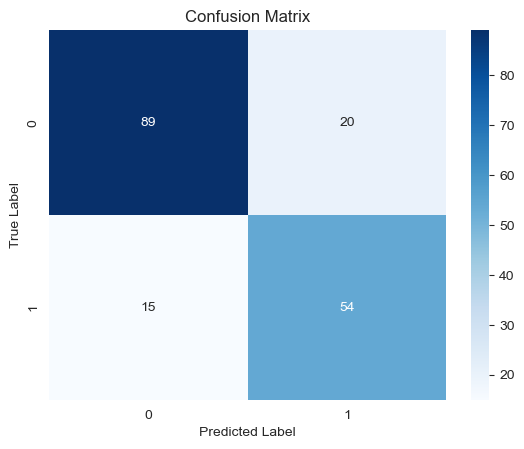

In [40]:
# Visualizing the confusion matrix using a heatmap for better clarity.
# This helps to quickly see the number of correct and incorrect classifications made by the model.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('conf_matrix', bbox_inches='tight')
plt.show()

# Model Comparison and Evaluation Section

In this section, I will evaluate and compare the performance of different machine learning models.
The goal is to test multiple models on the validation set and select the best-performing one based on accuracy.

In [37]:
# Here, I import various machine learning models from sklearn that I plan to compare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# Accuracy score will be used to evaluate how well each model performs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
# Splitting the dataset into training (80%) and validation (20%) sets
# The validation set will be used to assess model performance and avoid overfitting
X_train_split, X_val, y_train_split, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# I create a dictionary of models that I want to compare for performance on the validation set
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# This dictionary will store the accuracy score for each model
accuracy_results = {}

# Loop through each model, train it, make predictions, and calculate accuracy on the validation set
for model_name, model in models.items():
    model.fit(X_train_split, y_train_split)  # Навчання моделі
    y_pred = model.predict(X_val)  # Прогнозування на валідаційних даних
    accuracy = accuracy_score(y_val, y_pred)  # Обчислюємо точність
    accuracy_results[model_name] = accuracy  # Зберігаємо точність

# Output the accuracy of each model for comparison
for model_name, accuracy in accuracy_results.items():
    # Print the model name and its accuracy score formatted to 4 decimal places
    print(f'{model_name}: {accuracy:.4f}') 

Logistic Regression: 0.8034
Random Forest: 0.7640
Support Vector Machine: 0.6742
Decision Tree: 0.7865
K-Nearest Neighbors: 0.7079


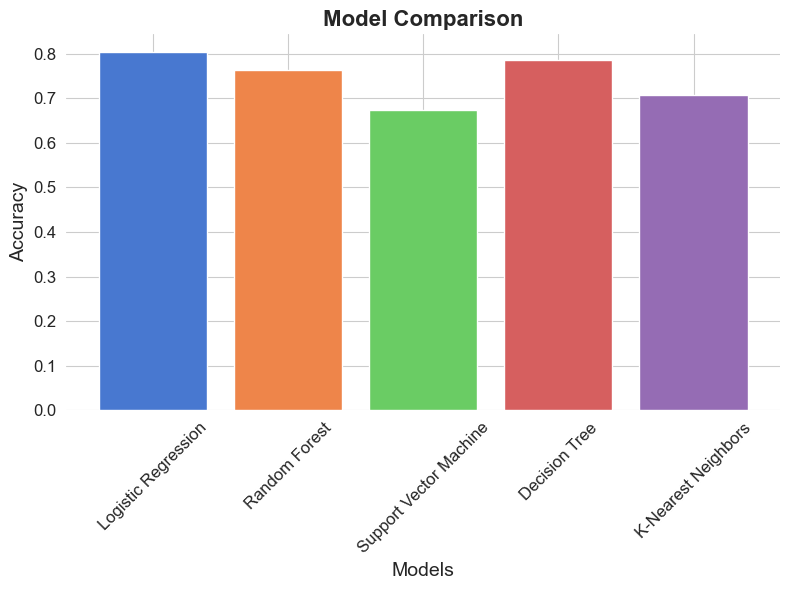

In [41]:
# Set 'whitegrid' style for a clean look and nice gridlines
sns.set_style('whitegrid')

# Use a built-in color palette for the bars
colors = sns.color_palette("muted")

# Create a bar chart with pleasant colors
plt.figure(figsize=(8, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=colors)

# Add a title and labels
plt.title('Model Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Set y-axis intervals for better readability
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Add a dark theme with contrast by removing the left and bottom spines
sns.despine(left=True, bottom=True)

# Save the figure as a PNG file with tight bounding box
plt.savefig('model_comp.png', bbox_inches='tight')

# Display the chart
plt.show()